In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',
                   names=['sepal length' ,'sepal width' ,'petal length', 'petal width', 'class'])

In [247]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [248]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


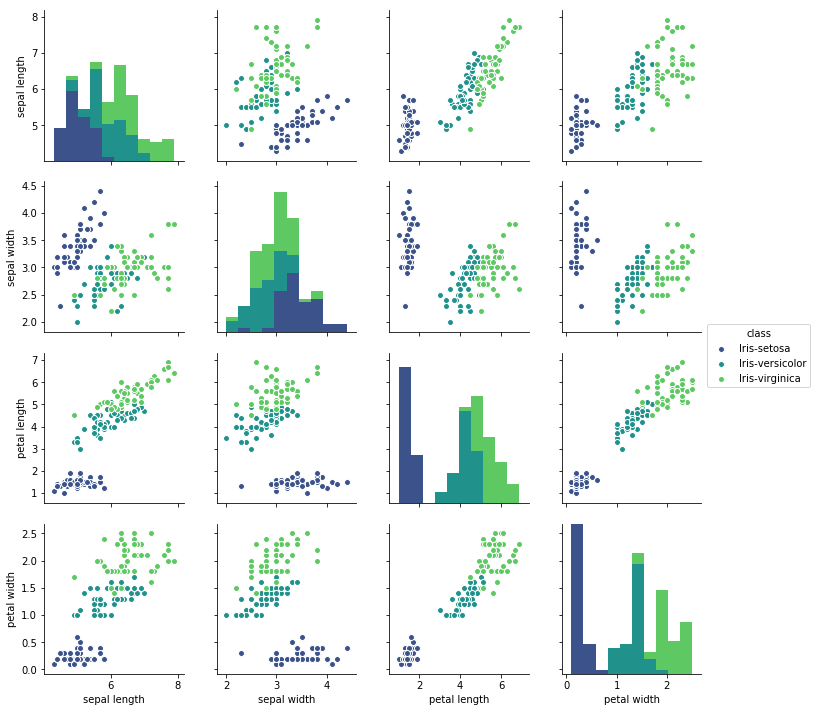

In [250]:
# Check to see how well the data correlates 
_=plt.figure(figsize=(6,6))
_=sns.pairplot(data,palette='viridis',hue='class')

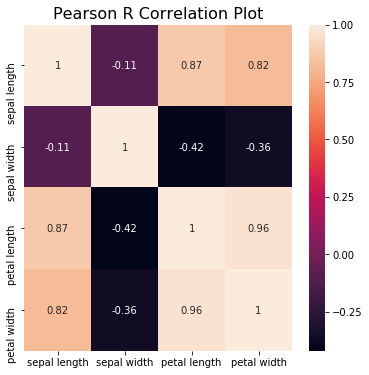

In [251]:
# How well are the features correlated?
_= plt.figure(figsize=(6,6))
# When annot=True, it writes the data value in each cell.
_=sns.heatmap(data.corr(),annot=True)
_= plt.title('Pearson R Correlation Plot',fontsize=16)

In [252]:
## Model Selection

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
# Assign data to new variables
X= data.iloc[:,0:4].values
y= data.iloc[:,4].values

In [256]:
X = StandardScaler().fit_transform(X)

In [257]:
# Split the data for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [258]:
## Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
dtree = DecisionTreeClassifier()

In [261]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [262]:
predictions = dtree.predict(X_test)

In [263]:
from sklearn.metrics import classification_report,confusion_matrix

In [264]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



In [265]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [266]:
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier()
cv_results_dtree = cross_val_score(dtree,X_train,y_train,cv=5)

In [267]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [268]:
print(np.mean(cv_results_dtree))

0.952244246981089


In [269]:
dtree.score(X_test, y_test)

0.9777777777777777

In [270]:
cv_results_dtree

array([0.90909091, 1.        , 1.        , 0.9047619 , 0.94736842])

In [271]:
## Random Forest

In [272]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [273]:
predictions = rfc.predict(X_test)

In [274]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



In [275]:
print (confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
knc = KNeighborsClassifier(n_neighbors = 1)

In [278]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [279]:
predictions = knc.predict(X_test)

In [280]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.96      0.96      0.96        45



In [281]:
print (confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [282]:
## Choosing a K value

In [283]:
error_rate = []

for i in range(1,10):
    
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    pred_i = knc.predict(X_test)
    # Calculate the error rate which is the mean of the residual (actual not equal predicted)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

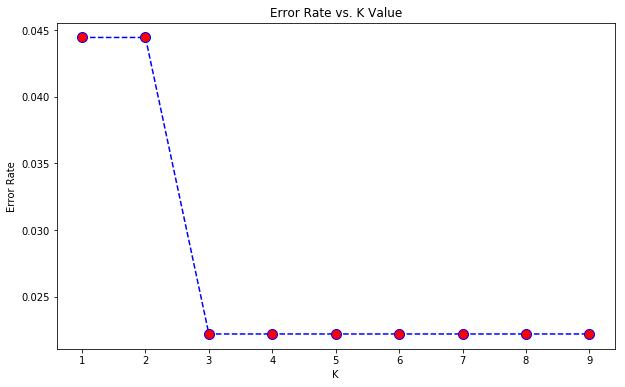

In [284]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# Pick K where the error rate is the smallest

In [285]:
# NOW WITH K=3
knc = KNeighborsClassifier(n_neighbors=3)

knc.fit(X_train,y_train)
predictions = knc.predict(X_test)

print('WITH K=3')
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

WITH K=3


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
